In [2]:
import torch
import torch.nn as nn  # we'll use this a lot going forward!

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
X = torch.linspace(1,70,70).reshape(-1,1)

In [4]:
torch.manual_seed(71) # to obtain reproducible results
e = torch.randint(-8,9,(70,1),dtype=torch.float)
print(e.sum())

tensor(-5.)


In [5]:
y = 2*X + 1 + e
print(y.shape)

torch.Size([70, 1])


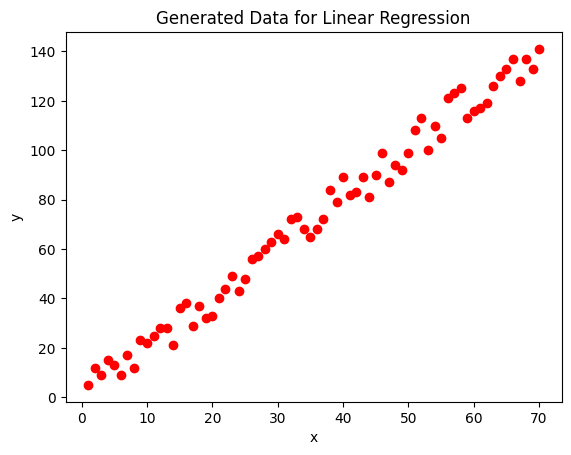

In [6]:
plt.scatter(X.numpy(), y.numpy(),color='red')  # Scatter plot of data points
plt.xlabel('x')
plt.ylabel('y')
plt.title('Generated Data for Linear Regression')
plt.show()

In [7]:
torch.manual_seed(59)

# Defining the model class
class Model(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features)
        
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

In [8]:
# Creating an instance of the model
torch.manual_seed(59)
model = Model(1, 1)
print('Weight:', model.linear.weight.item())
print('Bias:  ', model.linear.bias.item())

Weight: 0.10597813129425049
Bias:   0.9637961387634277


In [9]:
torch.manual_seed(59)
model = Model(1, 1)
print(model)
print('Weight:', model.linear.weight.item())
print('Bias:  ', model.linear.bias.item())

Model(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)
Weight: 0.10597813129425049
Bias:   0.9637961387634277


In [10]:
loss_function = nn.MSELoss()  # Mean Squared Error (MSE) loss

optimizer = torch.optim.SGD(model.parameters(), lr=0.0001)  # Stochastic Gradient

In [11]:
epochs = 50  # Number of training iterations
losses = []  # List to store loss values

for epoch in range(1, epochs + 1):  # Start from 1 to 50
    optimizer.zero_grad()  # Clear previous gradients
    y_pred = model(X)  # Forward pass
    loss = loss_function(y_pred, y)  # Compute loss
    losses.append(loss.item())  # Store loss value
    
    loss.backward()  # Compute gradients
    optimizer.step()  # Update weights

    # Print loss, weight, and bias for EVERY epoch (1 to 50)
    print(f'epoch: {epoch:2}  loss: {loss.item():10.8f}  '
          f'weight: {model.linear.weight.item():10.8f}  '
          f'bias: {model.linear.bias.item():10.8f}')


epoch:  1  loss: 5954.00195312  weight: 0.73509312  bias: 0.97723663
epoch:  2  loss: 2655.30761719  weight: 1.15417695  bias: 0.98620772
epoch:  3  loss: 1191.49755859  weight: 1.43334889  bias: 0.99220157
epoch:  4  loss: 541.92523193  weight: 1.61931860  bias: 0.99621207
epoch:  5  loss: 253.67466736  weight: 1.74320173  bias: 0.99890137
epoch:  6  loss: 125.76227570  weight: 1.82572591  bias: 1.00071061
epoch:  7  loss: 69.00058746  weight: 1.88069904  bias: 1.00193357
epoch:  8  loss: 43.81228256  weight: 1.91731894  bias: 1.00276589
epoch:  9  loss: 32.63482285  weight: 1.94171286  bias: 1.00333810
epoch: 10  loss: 27.67477417  weight: 1.95796239  bias: 1.00373697
epoch: 11  loss: 25.47373009  weight: 1.96878660  bias: 1.00402045
epoch: 12  loss: 24.49699783  weight: 1.97599685  bias: 1.00422692
epoch: 13  loss: 24.06353760  weight: 1.98079956  bias: 1.00438225
epoch: 14  loss: 23.87118340  weight: 1.98399854  bias: 1.00450337
epoch: 15  loss: 23.78580666  weight: 1.98612916  bia

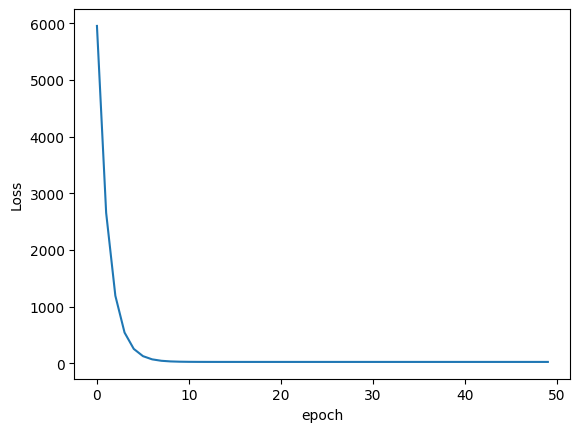

In [12]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch');
plt.show()

In [13]:
# Automatically determine x-range
x1 = torch.tensor([X.min().item(), X.max().item()])

# Extract model parameters
w1, b1 = model.linear.weight.item(), model.linear.bias.item()

# Compute y1 (predicted values)
y1 = x1 * w1 + b1


In [14]:
# Print weight, bias, and x/y values
print(f'Final Weight: {w1:.8f}, Final Bias: {b1:.8f}')
print(f'X range: {x1.numpy()}')
print(f'Predicted Y values: {y1.numpy()}')

Final Weight: 1.99034309, Final Bias: 1.00654805
X range: [ 1. 70.]
Predicted Y values: [  2.996891 140.33057 ]


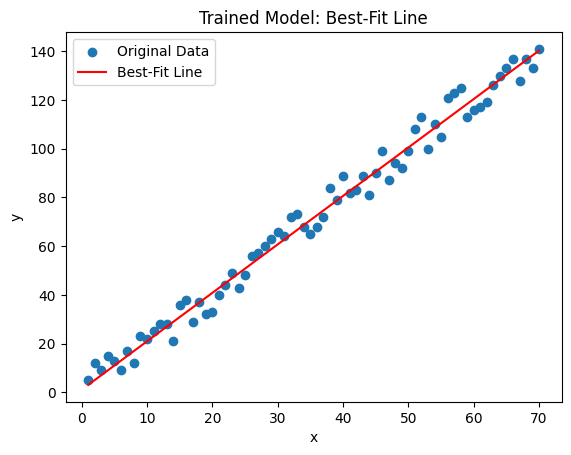

In [15]:
# Plot original data and best-fit line
plt.scatter(X.numpy(), y.numpy(), label="Original Data")
plt.plot(x1.numpy(), y1.numpy(), 'r', label="Best-Fit Line")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Trained Model: Best-Fit Line')
plt.legend()
plt.show()

In [ ]:
torch.save(model.state_dict(),'EXP01.pt')